<a href="https://colab.research.google.com/github/AarthiVelpula/ML-model-for-Health-Prediction/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

df = pd.read_csv('Data.csv')


df.head()


,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0.0,1.0,...,Never used e-cigarettes in my entire life,1.0,"White only, Non-Hispanic",0.0,0.0,0.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,1.0
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0.0,0.0,...,Never used e-cigarettes in my entire life,0.0,"White only, Non-Hispanic",0.0,0.0,1.0,1.0,"Yes, received Tdap",0.0,0.0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0.0,0.0,...,Never used e-cigarettes in my entire life,0.0,"White only, Non-Hispanic",1.0,0.0,0.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0.0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0.0,0.0,...,Never used e-cigarettes in my entire life,0.0,"White only, Non-Hispanic",0.0,0.0,1.0,1.0,"Yes, received tetanus shot but not sure what type",0.0,0.0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0.0,0.0,...,Never used e-cigarettes in my entire life,1.0,"Black only, Non-Hispanic",0.0,0.0,1.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0.0


In [ ]:
# Step 3: Data Preprocessing

# Separate numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Fill missing values for numeric columns with the mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values for non-numeric columns with the mode (most frequent value)
mode_values = {col: df[col].mode()[0] for col in non_numeric_columns}
df.fillna(mode_values, inplace=True)

# Convert categorical columns to numeric if necessary
df[non_numeric_columns] = df[non_numeric_columns].apply(lambda x: pd.Categorical(x).codes)

# Verify no NaN values remain
print("Missing values after filling:\n", df.isnull().sum())


Missing values after filling:
 PatientID                    0
State                        0
Sex                          0
GeneralHealth                0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVa

In [ ]:
# Step 4: Define Features and Target
import pandas as pd

target_columns = ['HadDiabetes', 'HadHeartAttack', 'HadAngina',
                       'HadStroke', 'HadSkinCancer', 'HadCOPD',
                       'HadKidneyDisease', 'HadDepressiveDisorder',
                       'HadArthritis']  # Example targets
X = df.drop(columns=target_columns)
y = df[target_columns].copy()  # Create a copy to avoid the warning

# Convert target columns to categorical and then get numerical codes
for column in target_columns:
    y[column] = pd.Categorical(y[column]).codes  # Convert to categorical and get codes in one step

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (15997, 26)
Target shape: (15997, 9)


In [ ]:
# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the split sizes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (12797, 26)
X_test shape: (3200, 26)
y_train shape: (12797, 9)
y_test shape: (3200, 9)


In [ ]:
# Step 6: Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Step 7: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization if needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
from sklearn.multioutput import MultiOutputClassifier

# Step 8: Training SVM Model (Modified)
classifier = MultiOutputClassifier(SVC(kernel='rbf', random_state=42))
classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=SVC(random_state=42))

In [ ]:
# Step 9: Make Predictions
y_pred = classifier.predict(X_test)

# Evaluate accuracy and other metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multilabel-indicator targets

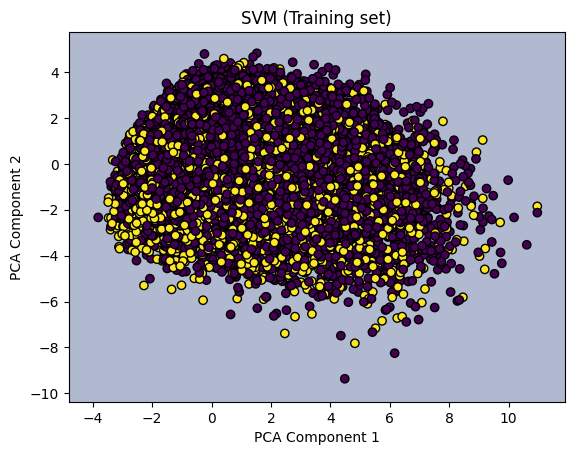

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Reduce the features to 2D using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Re-train the model on the 2D data for visualization
classifier_2d = SVC(kernel='rbf', random_state=42)
classifier_2d.fit(X_train_2d, y_train)

# Define a function to plot the decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Visualize Training Set
plot_decision_boundary(X_train_2d, y_train, classifier_2d, 'SVM (Training set)')


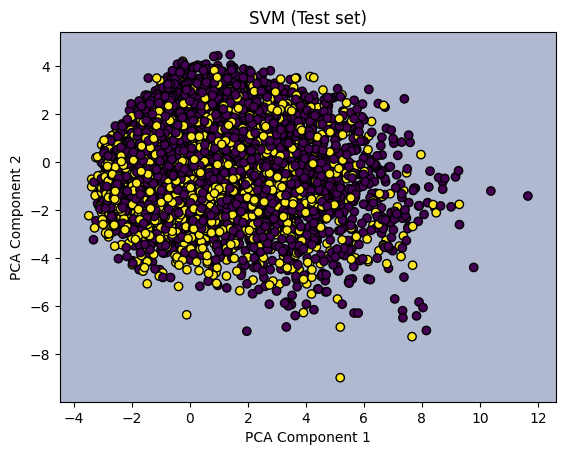

In [ ]:
plot_decision_boundary(X_test_2d, y_test, classifier_2d, 'SVM (Test set)')
